In [3]:
from sklearn import datasets 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression

In [5]:
bean= datasets.load_boston()
print (bean.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
def load_boston():
    scaler = StandardScaler()
    boston = datasets.load_boston()
    X=boston.data
    y=boston.target
    X = scaler.fit_transform(X)
    return train_test_split(X,y)

In [9]:
X_train, X_test, y_train, y_test = load_boston()

In [13]:
X_train.shape

(379, 13)

In [14]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
observations =zip (y_test, clf.predict(X_test))

In [36]:
r2 = r2_score(y_test, clf.predict(X_test))
print('R2 Score: %.4f' %r2)

R2 Score: 0.7323


In [31]:
mse = mean_squared_error(y_test, clf.predict(X_test))
print('MSE: %.4f' %mse)

MSE: 24.1579


In [32]:
# To implement a new model using L2 regularization 
from sklearn.linear_model import Ridge

#Create linear regression with ridge coeffecient 0.5 
ridge = Ridge(fit_intercept=True, alpha=0.5)

#Then train the model using the training set 
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
l_observed = zip (y_test, ridge.predict(X_test) )

In [37]:
l_r2 = r2_score(y_test, ridge.predict(X_test))
print('L2 R2 Score: %.4f' %l_r2)

L2 R2 Score: 0.7321


In [38]:
l2_mse = mean_squared_error(y_test, ridge.predict(X_test))
print('L2 MSE: %.4f' %l2_mse)

L2 MSE: 24.1772


In [48]:
#optimization process 
import numpy as np
print('Optimization values') 
print('alpha value\t R2\t MSE\t')

#interval of values to use for optimization 
alpha_values = np.linspace(0.0025,5,100)

o_r2 = np.array ([])
o_mse = np.array([])

for a in alpha_values:
    ridge = Ridge(fit_intercept=True, alpha=a)
    ridge.fit(X_train, y_train)
    observed_r2 = r2_score(y_test, ridge.predict(X_test))
    observed_mse = mean_squared_error(y_test, ridge.predict(X_test))
    
    o_r2 = np.append(o_r2, [observed_r2])
    o_mse = np.append(o_mse, [observed_mse])
    print('{:.3f}\t\t {:.4f}\t\t {:.4f}'.format(a,observed_r2,observed_mse))

Optimization values
alpha value	 R2	 MSE	
0.003		 0.7323		 24.1580
0.053		 0.7323		 24.1599
0.103		 0.7322		 24.1619
0.154		 0.7322		 24.1638
0.204		 0.7322		 24.1658
0.255		 0.7322		 24.1677
0.305		 0.7321		 24.1697
0.356		 0.7321		 24.1716
0.406		 0.7321		 24.1736
0.457		 0.7321		 24.1755
0.507		 0.7321		 24.1775
0.558		 0.7320		 24.1795
0.608		 0.7320		 24.1814
0.659		 0.7320		 24.1834
0.709		 0.7320		 24.1854
0.760		 0.7319		 24.1874
0.810		 0.7319		 24.1893
0.861		 0.7319		 24.1913
0.911		 0.7319		 24.1933
0.962		 0.7319		 24.1953
1.012		 0.7318		 24.1973
1.063		 0.7318		 24.1993
1.113		 0.7318		 24.2013
1.164		 0.7318		 24.2033
1.214		 0.7317		 24.2052
1.264		 0.7317		 24.2072
1.315		 0.7317		 24.2092
1.365		 0.7317		 24.2112
1.416		 0.7317		 24.2132
1.466		 0.7316		 24.2152
1.517		 0.7316		 24.2172
1.567		 0.7316		 24.2193
1.618		 0.7316		 24.2213
1.668		 0.7315		 24.2233
1.719		 0.7315		 24.2253
1.769		 0.7315		 24.2273
1.820		 0.7315		 24.2293
1.870		 0.7315		 24.2313
1.921		 

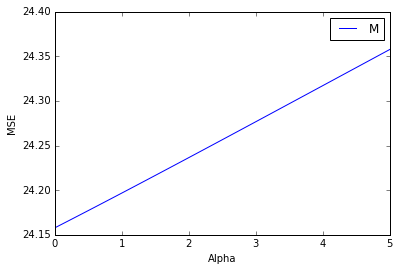

In [49]:
%matplotlib inline
import pylab as pl

from pylab import *

pl.plot(alpha_values, o_mse, label='MSE')
pl.legend( ('MSE') )
pl.ylabel('MSE')
pl.xlabel('Alpha')
pl.show()


In [54]:
# it appears that an alpha value of 0.025 would be appropiate